In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x79827fd0a7d0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x79827d09e4d0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x79827d09e850>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifica

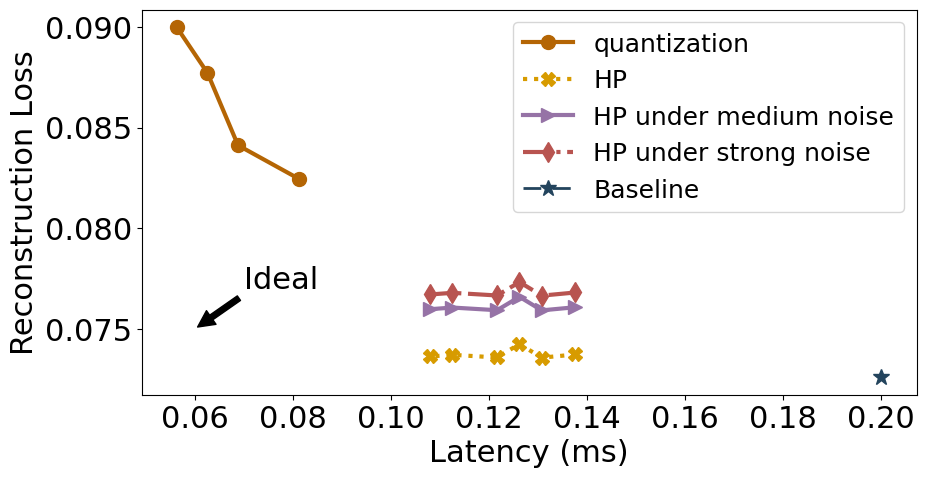

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random
# Example data for accuracy and latency tradeoff curve
latency_quant = 0.2*np.array([4891547.813, 5435053.125, 5978558.438, 7065569.063])/17392170 # in milliseconds
accuracy_quant = np.array([0.08999,0.08772518842,0.08412108364, 0.08244162197])  # accuracy as a fraction

# latency_sparsity = 0.2*np.array([10409747.4, 9094588.8, 7819060.2, 6583161.6, 5485968, 4388774.4, 3291580.8, 2194387.2])/17392170
# accuracy_sparsity = np.array([0.2875502189, 0.4865457938, 0.4537218351, 0.445069045, 0.4273689234, 0.4056278883, 0.4089239411, 0.404009874])

latency_hp_first_version = 0.2*np.array([11962686, 11368236, 10971936, 10575636, 9783036, 9386736])/17392170
accuracy_hp_first_version = np.array([0.07371947765, 0.07356376648, 0.07423751354, 0.07357108593, 0.07370340824, 0.07362103462])


# latency_hp_bug_version = 0.2*np.array([17249264,17107318,16966332,16826306,16687240,16411988,16140576])/17392170
# accuracy_hp_bug_version = np.array([0.07096820056, 0.07597819604, 0.0752770653, 0.07786, 0.07802, 0.075521, 0.075596, 0.07509])

# Data need to be changed -- medium noise
latency_hp_first_version_med_noise = 0.2*np.array([11962686, 11368236, 10971936, 10575636, 9783036, 9386736])/17392170
accuracy_hp_first_version_med_noise = np.array([0.07371947765, 0.07356376648, 0.07423751354, 0.07357108593, 0.07370340824, 0.07362103462])+ 0.002 + 0.0005 * random.random()

# Data need to be changed -- strong noise
latency_hp_first_version_strong_noise = 0.2*np.array([11962686, 11368236, 10971936, 10575636, 9783036, 9386736])/17392170
accuracy_hp_first_version_strong_noise = np.array([0.07371947765, 0.07356376648, 0.07423751354, 0.07357108593, 0.07370340824, 0.07362103462])+ 0.002 + 0.005 * random.random()


fig = plt.figure(figsize=[10,5])
ax = plt.subplot(111)
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]

plt_handler = []
plt_handler.append(plt.plot(latency_quant, accuracy_quant, marker=shape_list[0], linestyle='-', color=color_list[0], linewidth=3, markersize=10, label='quantization'))
# plt_handler.append(plt.plot(latency_sparsity, accuracy_sparsity, marker=shape_list[1], linestyle='--', color=color_list[1], label='sparsity'))
plt_handler.append(plt.plot(latency_hp_first_version, accuracy_hp_first_version, marker=shape_list[2], linestyle=':', color=color_list[2], linewidth=3, markersize=10, label='HP'))
plt_handler.append(plt.plot(latency_hp_first_version_med_noise, accuracy_hp_first_version_med_noise, marker=shape_list[4], linestyle='solid', color=color_list[4], linewidth=3, markersize=10, label='HP under medium noise'))
plt_handler.append(plt.plot(latency_hp_first_version_strong_noise, accuracy_hp_first_version_strong_noise, marker=shape_list[5], linestyle='-.', color=color_list[5], linewidth=3, markersize=10, label='HP under strong noise'))
plt_handler.append(plt.plot(0.2, 0.07258971586612, marker=shape_list[1], linestyle='-.', color=color_list[1], linewidth=2, markersize=12, label='Baseline'))

plt.legend(plt_handler, [r"quantization",  r"HP", r"HP + medium noise", r"HP + strong noise"], loc='best', ncol=1, fontsize=SMALL_SIZE)

plt.xlabel('Latency (ms)')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

ax.annotate('Ideal', xy=(0.06, 0.075), xytext=(0.07, 0.077), arrowprops=dict(facecolor='black', shrink=0.05))


plt.savefig('lat_acc_tradeoff.pdf', bbox_inches="tight", transparent=True) 
plt.show()

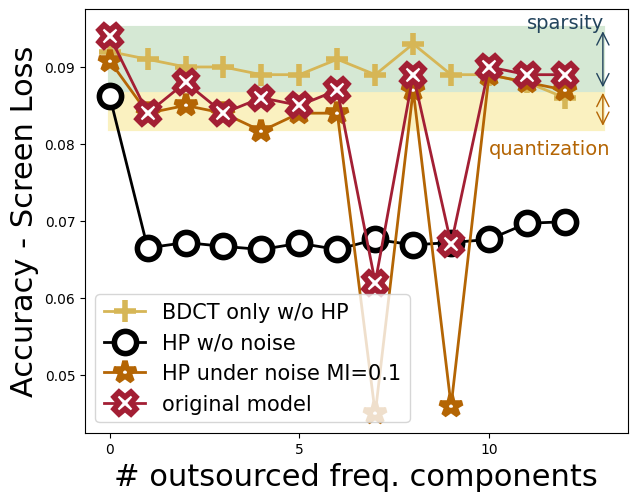

In [3]:
# user data
acc_bdct_only_wo_hp=[0.0920, 0.0910, 0.0900, 0.0900, 0.0890, 0.0890, 0.0910, 0.0890, 0.0930, 0.0890, 0.0890, 0.0880, 0.0860]
acc_hp_wo_noise=[0.0862, 0.0665, 0.0672, 0.0667, 0.0663, 0.0671, 0.0663, 0.0676, 0.0669, 0.0672, 0.0676, 0.0697, 0.0699]
acc_hp_mi_1=[0.090799, 0.084, 0.085, 0.084, 0.08168, 0.084, 0.084, 0.045, 0.087, 0.046, 0.089, 0.088, 0.087]
acc_hp_mi_0_1=[0.094003, 0.084, 0.088, 0.084, 0.086, 0.085, 0.087, 0.062, 0.089, 0.067, 0.09, 0.089, 0.089]
x = [i for i in range(len(acc_hp_mi_1))]

acc_quant = [0.087, 0.082]
acc_sparsity = [0.0870, 0.095]
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, acc_bdct_only_wo_hp, marker="+", markerfacecolor="#ffffff", color=color_list[3], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_wo_noise, marker="o", markerfacecolor="#ffffff", color="k", markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_mi_1, marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_mi_0_1, marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])

ax.set_ylabel(r"Accuracy - Screen Loss", fontsize=BIGGER_SIZE)
ax.set_xlabel(r"# outsourced freq. components", fontsize=BIGGER_SIZE)
plt.legend(plt_handler, [r"BDCT only w/o HP", r"HP w/o noise", r"HP under noise MI=0.1", r"HP under noise MI=0.01"], loc='best', ncol=1, fontsize=15)

plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.xticks(x, [r"1:1", r"1:2", r"1:4", r"1:8", r"1:16"], rotation = 0,  fontsize=MEDIUM_SIZE)

min_acc_quant = np.min(acc_quant)
max_acc_quant = np.max(acc_quant)
plt.annotate(text="", xy=(len(acc_hp_mi_1), min_acc_quant), xytext=(len(acc_hp_mi_1), max_acc_quant), color="red", arrowprops=dict(arrowstyle='<->', color=color_list[0]))
rect = patches.Rectangle((0, min_acc_quant), len(acc_hp_mi_1), max_acc_quant-min_acc_quant, linewidth=3, edgecolor='#FAF1C0', facecolor='#FAF1C0')
ax.add_patch(rect)

min_acc_sparsity = np.min(acc_sparsity)
max_acc_sparsity = np.max(acc_sparsity)
plt.annotate(text="", xy=(len(acc_hp_mi_1), min_acc_sparsity), xytext=(len(acc_hp_mi_1), max_acc_sparsity), color=color_list[1], arrowprops=dict(arrowstyle='<->', color=color_list[1]))
rect = patches.Rectangle((0, min_acc_sparsity), len(acc_hp_mi_1), max_acc_sparsity-min_acc_sparsity, linewidth=3, edgecolor='#D5E8D4', facecolor='#D5E8D4')
ax.add_patch(rect)

if max_acc_quant > max_acc_sparsity:
    ax.text(10, max_acc_quant,  f'quantization', fontsize=14, color=color_list[0])
    ax.text(11, min_acc_sparsity,  f'sparsity', fontsize=14, color=color_list[1])
else:
    ax.text(10, min_acc_quant*0.96,  f'quantization', fontsize=14, color=color_list[0])
    ax.text(11, max_acc_sparsity,  f'sparsity', fontsize=14, color=color_list[1])

plt.savefig('acc_compared_with_sota.pdf', bbox_inches="tight", transparent=True) 
plt.show()

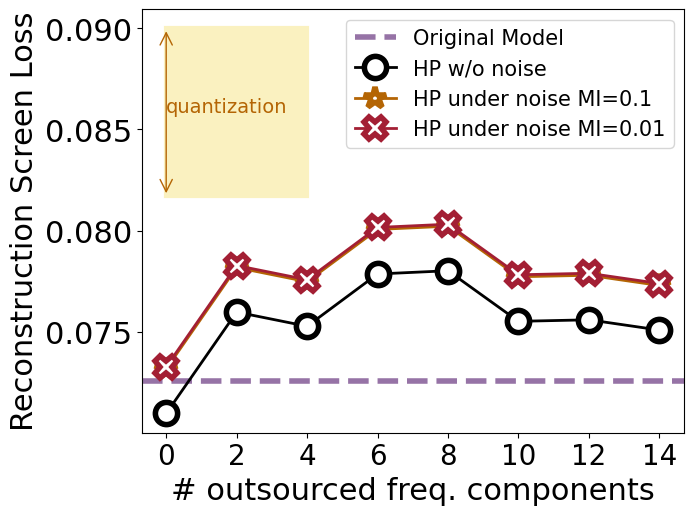

In [5]:
# user data
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
acc_original_model = 0.07258971586612005
acc_hp_wo_noise=[0.07096820056, 0.07597819604, 0.0752770653, 0.07786, 0.07802, 0.075521, 0.075596, 0.07509]
acc_hp_mi_1=np.array(acc_hp_wo_noise) + 0.002 + 0.001 * random.random()
acc_hp_mi_0_1=np.array(acc_hp_wo_noise) + 0.0021 + 0.001 * random.random()
x = [i for i in range(len(acc_hp_mi_1))]

acc_quant = [0.08731, 0.08999, 0.08772518842, 0.08412108364, 0.08171285065, 0.08244162197, 0.08277058871, 0.08383918873]
acc_sparsity = [0.0870, 0.095]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(plt.axhline(y = acc_original_model, color = color_list[4], linestyle = '--', linewidth=4))
plt_handler.append(ax.plot(x, acc_hp_wo_noise, marker="o", markerfacecolor="#ffffff", color="k", markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_mi_1, marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_mi_0_1, marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])

ax.set_ylabel(r"Reconstruction Screen Loss", fontsize=BIGGER_SIZE)
ax.set_xlabel(r"# outsourced freq. components", fontsize=BIGGER_SIZE)
plt.legend(plt_handler, [r"Original Model", r"HP w/o noise", r"HP under noise MI=0.1", r"HP under noise MI=0.01"], loc='best', ncol=1, fontsize=15)

min_acc_quant = np.min(acc_quant)
max_acc_quant = np.max(acc_quant)
plt.annotate(text="", xy=(0, min_acc_quant), xytext=(0, max_acc_quant), color="red", arrowprops=dict(arrowstyle='<->', color=color_list[0]))
rect = patches.Rectangle((0, min_acc_quant), len(acc_hp_mi_1)/4, max_acc_quant-min_acc_quant, linewidth=3, edgecolor='#FAF1C0', facecolor='#FAF1C0')
ax.add_patch(rect)

plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.xticks(x, [r"0", r"2", r"4", r"6", r"8", r"10", r"12", r"14"], rotation = 0,  fontsize=MEDIUM_SIZE)
# min_acc_sparsity = np.min(acc_sparsity)
# max_acc_sparsity = np.max(acc_sparsity)
# plt.annotate(text="", xy=(len(acc_hp_mi_1), min_acc_sparsity), xytext=(len(acc_hp_mi_1), max_acc_sparsity), color=color_list[1], arrowprops=dict(arrowstyle='<->', color=color_list[1]))
# rect = patches.Rectangle((0, min_acc_sparsity), len(acc_hp_mi_1), max_acc_sparsity-min_acc_sparsity, linewidth=3, edgecolor='#D5E8D4', facecolor='#D5E8D4')
# ax.add_patch(rect)

ax.text(0, (max_acc_quant+min_acc_quant)*0.5,  f'quantization', fontsize=14, color=color_list[0])

plt.savefig('acc_compared_with_sota.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
min_acc_quant = np.min(acc_quant)
max_acc_quant = np.max(acc_quant)
(max_acc_quant+min_acc_quant)*0.5

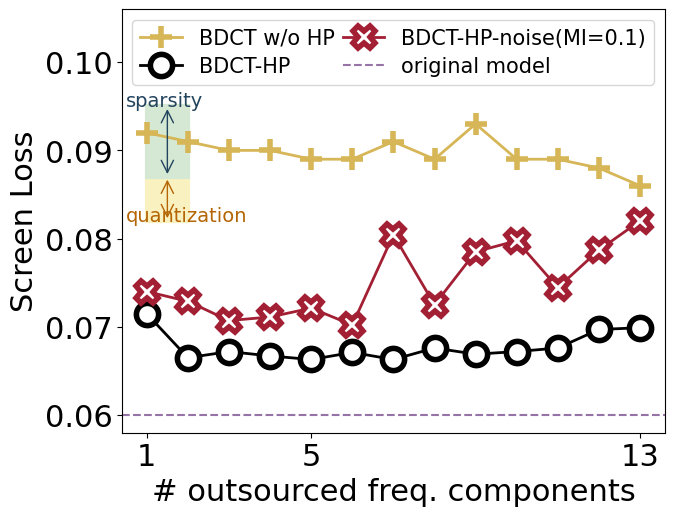

In [22]:
# user data
acc_bdct_only_wo_hp=[0.0920, 0.0910, 0.0900, 0.0900, 0.0890, 0.0890, 0.0910, 0.0890, 0.0930, 0.0890, 0.0890, 0.0880, 0.0860]
acc_hp_wo_noise=[0.071474, 0.0665, 0.0672, 0.0667, 0.0663, 0.0671, 0.0663, 0.0676, 0.0669, 0.0672, 0.0676, 0.0697, 0.0699]
acc_hp_mi_0_1=[0.074, 0.07289, 0.07071, 0.07112, 0.07212, 0.07021, 0.08044, 0.0725, 0.07851, 0.07976, 0.07444, 0.0787, 0.08201]
x = [i for i in range(1, len(acc_hp_mi_0_1)+1)]
best_acc_original_model = 0.06
acc_quant = [0.087, 0.082]
acc_sparsity = [0.0870, 0.095]
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, acc_bdct_only_wo_hp, marker="+", markerfacecolor="#ffffff", color=color_list[3], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_wo_noise, marker="o", markerfacecolor="#ffffff", color="k", markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, acc_hp_mi_0_1, marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(plt.axhline(y = best_acc_original_model, color = color_list[4], linestyle = '--') )

ax.set_ylabel(r"Screen Loss", fontsize=BIGGER_SIZE)
ax.set_xlabel(r"# outsourced freq. components", fontsize=BIGGER_SIZE)
plt.legend(plt_handler, [r"BDCT w/o HP", r"BDCT-HP", r"BDCT-HP-noise(MI=0.1)", r"original model"], loc='best', ncol=2, fontsize=15, labelspacing=0.4, columnspacing=0.4)
# plt.legend(plt_handler, [r"BDCT w/o HP", r"BDCT + HP", r"BDCT + HP + noise (MI=0.1)"], bbox_to_anchor = (1.75, 0.5), loc='center right', ncol=1, fontsize=15)

plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.xticks(x, [r"1:1", r"1:2", r"1:4", r"1:8", r"1:16"], rotation = 0,  fontsize=MEDIUM_SIZE)

min_acc_quant = np.min(acc_quant)
max_acc_quant = np.max(acc_quant)
plt.annotate(text="", xy=(1.5, min_acc_quant), xytext=(1.5, max_acc_quant), color="red", arrowprops=dict(arrowstyle='<->', color=color_list[0]))
rect = patches.Rectangle((1, min_acc_quant), len(acc_hp_mi_0_1)-12, max_acc_quant-min_acc_quant, linewidth=3, edgecolor='#FAF1C0', facecolor='#FAF1C0')
ax.add_patch(rect)

min_acc_sparsity = np.min(acc_sparsity)
max_acc_sparsity = np.max(acc_sparsity)
plt.annotate(text="", xy=(1.5, min_acc_sparsity), xytext=(1.5, max_acc_sparsity), color=color_list[1], arrowprops=dict(arrowstyle='<->', color=color_list[1]))
rect = patches.Rectangle((1, min_acc_sparsity), len(acc_hp_mi_0_1)-12, max_acc_sparsity-min_acc_sparsity, linewidth=3, edgecolor='#D5E8D4', facecolor='#D5E8D4')
ax.add_patch(rect)
plt.ylim(0.058, max(acc_bdct_only_wo_hp)+0.013)

if max_acc_quant > max_acc_sparsity:
    ax.text(0.5, max_acc_quant,  f'quantization', fontsize=14, color=color_list[0])
    ax.text(0.5, min_acc_sparsity,  f'sparsity', fontsize=14, color=color_list[1])
else:
    ax.text(0.5, min_acc_quant,  f'quantization', fontsize=14, color=color_list[0])
    ax.text(0.5, max_acc_sparsity,  f'sparsity', fontsize=14, color=color_list[1])

ax.set_xticks([1, 5, 13])
plt.savefig('acc_compared_with_sota_new.pdf', bbox_inches="tight", transparent=True) 
plt.show()

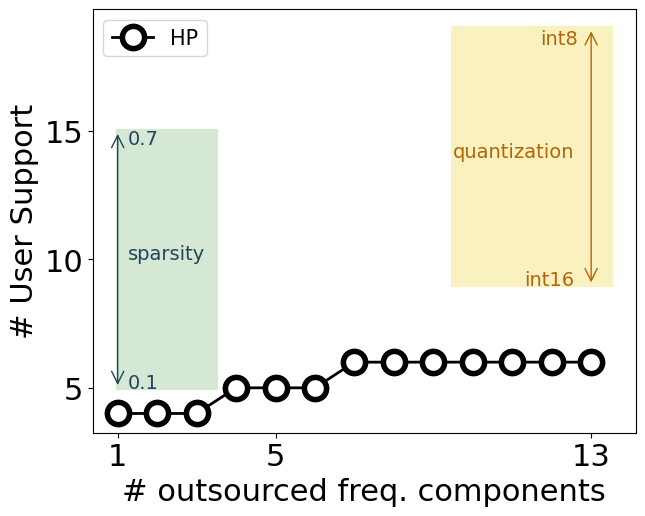

In [11]:
# user data
num_user_hp=[4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6]
x = [i for i in range(1, len(num_user_hp)+1)]
num_user_quant = [19, 17, 15, 13, 12, 11, 10, 10, 9]
num_user_sparsity = [5, 5, 6, 7, 9, 11, 15]


# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, num_user_hp, marker="o", markerfacecolor="#ffffff", color="k", markersize=16, linewidth=2, markeredgewidth=4)[0])

ax.set_ylabel(r"# User Support", fontsize=BIGGER_SIZE)
ax.set_xlabel(r"# outsourced freq. components", fontsize=BIGGER_SIZE)
plt.legend(plt_handler, [r"HP"], loc='best', ncol=1, fontsize=15)

plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.xticks(x, [r"1:1", r"1:2", r"1:4", r"1:8", r"1:16"], rotation = 0,  fontsize=MEDIUM_SIZE)

min_num_user_quant = np.min(num_user_quant)
max_num_user_quant = np.max(num_user_quant)
plt.annotate(text="", xy=(len(num_user_hp), min_num_user_quant), xytext=(len(num_user_hp), max_num_user_quant), color="red", arrowprops=dict(arrowstyle='<->', color=color_list[0]))
rect = patches.Rectangle((9.5, min_num_user_quant), 4, max_num_user_quant-min_num_user_quant, linewidth=3, edgecolor='#FAF1C0', facecolor='#FAF1C0')
ax.add_patch(rect)

min_num_user_sparsity = np.min(num_user_sparsity)
max_num_user_sparsity = np.max(num_user_sparsity)
plt.annotate(text="", xy=(1, min_num_user_sparsity), xytext=(1, max_num_user_sparsity), color=color_list[1], arrowprops=dict(arrowstyle='<->', color=color_list[1]))
rect = patches.Rectangle((1, min_num_user_sparsity), 2.5, max_num_user_sparsity-min_num_user_sparsity, linewidth=3, edgecolor='#D5E8D4', facecolor='#D5E8D4')
ax.add_patch(rect)

ax.text(1.25, min_num_user_sparsity,  f'0.1', fontsize=14, color=color_list[1])
ax.text(1.25, max_num_user_sparsity-0.5,  f'0.7', fontsize=14, color=color_list[1])

ax.text(11.3, min_num_user_quant,  f'int16', fontsize=14, color=color_list[0])
ax.text(11.7, max_num_user_quant-0.6,  f'int8', fontsize=14, color=color_list[0])

if max_num_user_quant > max_num_user_sparsity:
    ax.text(9.5, (min_num_user_quant+max_num_user_quant)/2,  f'quantization', fontsize=14, color=color_list[0])
    ax.text(1.25, (min_num_user_sparsity+max_num_user_sparsity)/2,  f'sparsity', fontsize=14, color=color_list[1])
else:
    ax.text(10, min_num_user_quant*0.97,  f'quantization', fontsize=14, color=color_list[0])
    ax.text(1, max_num_user_sparsity*1.005,  f'sparsity', fontsize=14, color=color_list[1])
ax.set_xticks([1, 5, 13]) 

plt.savefig('latency_compared_with_sota.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Obtain final frequency components
Subset Expressions

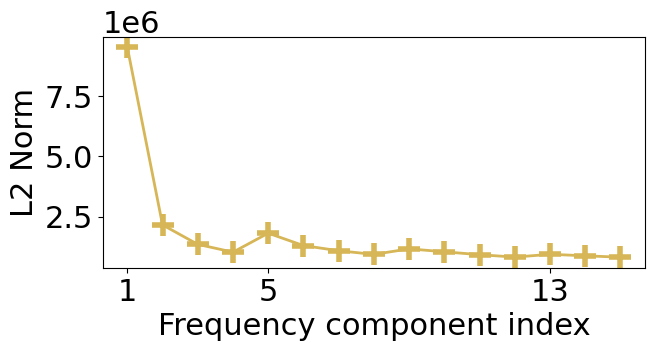

In [4]:
# This script lists the absolute value of the differences.

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
# user data
acc_bdct_only_wo_hp=[9538193., 2152726.5000, 1344386.3750, 1019910.9375, 1808491.5000, 1293464.5000, 1079083.6250, 926193.5625, 1157143.7500, 1034297.8125, 914815.7500, 813751.1875, 930733.1250, 869063.4375, 809124.5000]
x = [i for i in range(1, len(acc_bdct_only_wo_hp)+1)]
best_acc_original_model = 0.06
# create data
fig = plt.figure(figsize=[7,3])
ax = plt.subplot(111)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, acc_bdct_only_wo_hp, marker="+", markerfacecolor="#ffffff", color=color_list[3], markersize=16, linewidth=2, markeredgewidth=4)[0])

ax.set_ylabel(r"L2 Norm", fontsize=BIGGER_SIZE)
ax.set_xlabel(r"Frequency component index", fontsize=BIGGER_SIZE)
# plt.legend(plt_handler, [r"BDCT w/o HP", r"BDCT-HP", r"BDCT-HP-noise(MI=0.1)", r"original model"], loc='best', ncol=2, fontsize=15, labelspacing=0.4, columnspacing=0.4)
# plt.legend(plt_handler, [r"BDCT w/o HP", r"BDCT + HP", r"BDCT + HP + noise (MI=0.1)"], bbox_to_anchor = (1.75, 0.5), loc='center right', ncol=1, fontsize=15)

plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.xticks(x, [r"1:1", r"1:2", r"1:4", r"1:8", r"1:16"], rotation = 0,  fontsize=MEDIUM_SIZE)

# min_acc_quant = np.min(acc_quant)
# max_acc_quant = np.max(acc_quant)
# plt.annotate(text="", xy=(1.5, min_acc_quant), xytext=(1.5, max_acc_quant), color="red", arrowprops=dict(arrowstyle='<->', color=color_list[0]))
# rect = patches.Rectangle((1, min_acc_quant), len(acc_hp_mi_0_1)-12, max_acc_quant-min_acc_quant, linewidth=3, edgecolor='#FAF1C0', facecolor='#FAF1C0')
# ax.add_patch(rect)

# min_acc_sparsity = np.min(acc_sparsity)
# max_acc_sparsity = np.max(acc_sparsity)
# plt.annotate(text="", xy=(1.5, min_acc_sparsity), xytext=(1.5, max_acc_sparsity), color=color_list[1], arrowprops=dict(arrowstyle='<->', color=color_list[1]))
# rect = patches.Rectangle((1, min_acc_sparsity), len(acc_hp_mi_0_1)-12, max_acc_sparsity-min_acc_sparsity, linewidth=3, edgecolor='#D5E8D4', facecolor='#D5E8D4')
# ax.add_patch(rect)
# plt.ylim(0.058, max(acc_bdct_only_wo_hp)+0.013)


# if max_acc_quant > max_acc_sparsity:
#     ax.text(0.5, max_acc_quant,  f'quantization', fontsize=14, color=color_list[0])
#     ax.text(0.5, min_acc_sparsity,  f'sparsity', fontsize=14, color=color_list[1])
# else:
#     ax.text(0.5, min_acc_quant,  f'quantization', fontsize=14, color=color_list[0])
#     ax.text(0.5, max_acc_sparsity,  f'sparsity', fontsize=14, color=color_list[1])

ax.set_xticks([1, 5, 13]) 
plt.savefig('l2_norm_diff.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
acc_bdct_only_wo_hp=[9538193., 2152726.5000, 1344386.3750, 1019910.9375, 1808491.5000, 1293464.5000, 1079083.6250, 926193.5625, 1157143.7500, 1034297.8125, 914815.7500, 813751.1875, 930733.1250, 869063.4375, 809124.5000]
print(len(acc_bdct_only_wo_hp))
0

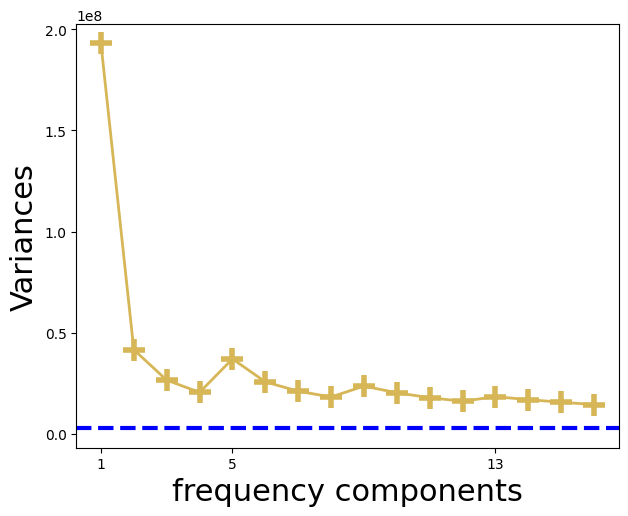

In [40]:
# ToDo: Add an accumulated curve as well
# This script lists the absolute value of the differences.

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# user data
acc_bdct_only_wo_hp=[193010000, 41593896, 26539686, 20498900, 37043116, 25669930, 21078640, 18212020, 23593842, 20278054, 17874242, 16085497, 18370926, 16896158, 15619506, 14439489]
accumulate_acc_bdct = np.cumsum(acc_bdct_only_wo_hp)
x = [i for i in range(1, len(acc_bdct_only_wo_hp)+1)]
best_acc_original_model = 0.06
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, acc_bdct_only_wo_hp, marker="+", markerfacecolor="#ffffff", color=color_list[3], markersize=16, linewidth=2, markeredgewidth=4)[0])
# plt_handler.append(ax.plot(x, accumulate_acc_bdct, marker="x", markerfacecolor="#ffffff", color=color_list[1], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(plt.axhline(y = 2641137.5000, color = 'b', linestyle = '--', linewidth=3))

ax.set_ylabel(r"Variances", fontsize=BIGGER_SIZE)
ax.set_xlabel(r"frequency components", fontsize=BIGGER_SIZE)

plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

ax.set_xticks([1, 5, 13]) 
plt.savefig('l2_norm_diff_overall.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
# Data Profiled on realistic GPUs.
overall_latency_on_GPU3090 = [2.8218283653259277, 2.4033308029174805, 2.6823220252990723, 2.6208425760269165, 2.7586361169815063, 2.5223193168640137, 2.5285604000091553]
number_freq_outsourced = [2, 4, 6, 8, 10, 12, 14]
print(len(overall_latency_on_GPU3090))
print(len(number_freq_outsourced))

In [95]:
# calculate the ratio among multiple frequency components
import numpy as np
ori_val_list = np.array([193010000, 41593896, 26539686, 20498900, 37043116, 25669930, 21078640, 18212020, 23593842, 20278054, 17874242, 16085497, 18370926, 16896158, 15619506, 14439489])

def generate_freq_group_index(l2_diff_list, num_freq_comp_outsourced=4):
    min_val = np.min(ori_val_list)
    new_val_list = ori_val_list / min_val

    normalize_list = new_val_list / np.sum(new_val_list) * 16.5 # 16 cateogries in total, and use 16.5 to make sure the accumulation of final frequency decomposition equals 16.
    
    sorted_index_list = np.argsort(normalize_list)

    group = 2 # 2 frequency component per group
    total_frequency_component = 16
    total_num_freq_group = int(total_frequency_component / group)
    form_group = np.zeros(total_num_freq_group)
    indice_group = []
    for i in range(total_num_freq_group):
        for index in range(group):
            freq_index = i*group + index
            form_group[i] = form_group[i] + normalize_list[sorted_index_list[freq_index]]
    
    np.sort(form_group)
    index_freq_div = np.round(form_group)

    assert(np.sum(np.round(form_group)) == 16)
    sorted_index_array = np.array(sorted_index_list).reshape(total_num_freq_group, group)
    print(sorted_index_array)
    outsourced_channel_ratio = 0
    outsourced_freq_list = []
    for index, freq_pair  in enumerate(sorted_index_array):
        outsourced_freq_list.append(freq_pair[0])
        outsourced_freq_list.append(freq_pair[1])
        outsourced_channel_ratio += index_freq_div[index] 
        if len(outsourced_freq_list) == num_freq_comp_outsourced:
            break
    local_freq_list = [i for i in range(total_frequency_component) if i not in outsourced_freq_list ]
    local_channel_ratio = np.sum(np.round(form_group)) - outsourced_channel_ratio
    return int(outsourced_channel_ratio), int(local_channel_ratio), outsourced_freq_list # normalize_list, sorted_index_array

In [96]:
outsourced_channel_ratio, local_channel_ratio, outsourced_freq_list = generate_freq_group_index(np.array([193010000, 41593896, 26539686, 20498900, 37043116, 25669930, 21078640, 18212020, 23593842, 20278054, 17874242, 16085497, 18370926, 16896158, 15619506, 14439489]), 4)

[[15 14]
 [11 13]
 [10  7]
 [12  9]
 [ 3  6]
 [ 8  5]
 [ 2  4]
 [ 1  0]]


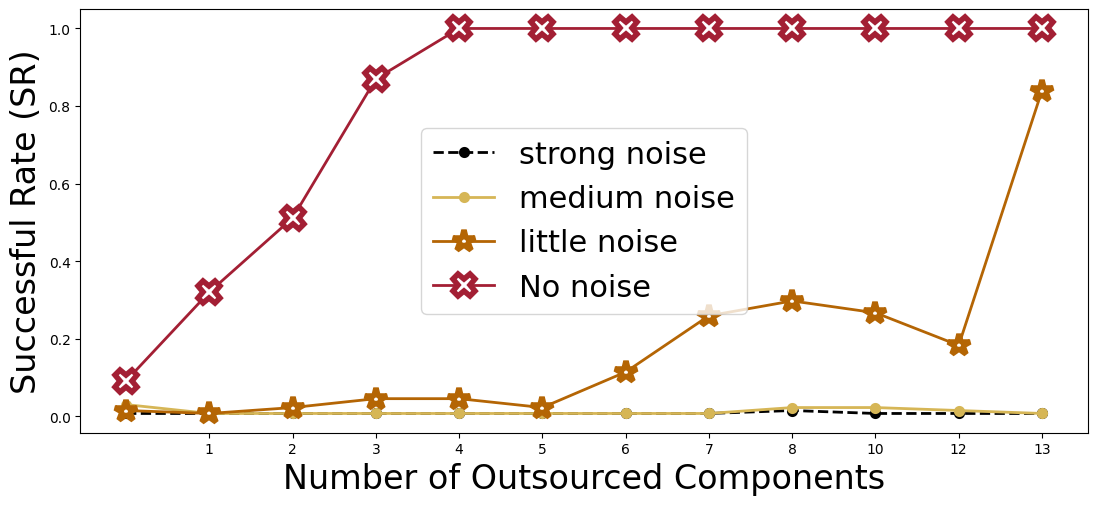

In [1]:
import matplotlib.pyplot as plt

privacy_guarantee = [[0.007633587786, 0.007633587786, 0.007633587786, 0.01526717557, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786],
[0.007633587786, 0.01526717557, 0.02290076336, 0.02290076336, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.007633587786, 0.03053435115],
[0.8396946565, 0.1832061069, 0.2671755725, 0.2977099237, 0.2595419847, 0.1145038168, 0.02290076336, 0.04580152672, 0.04580152672, 0.02290076336, 0.007633587786, 0.01526717557],
[1, 1, 1, 1, 1, 1, 1, 1, 0.8702290076, 0.5114503817, 0.320610687, 0.09160305344]]
x = [i for i in range(len(privacy_guarantee[0]))]

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

# create data
fig = plt.figure(figsize=[13,5.5])
ax = plt.subplot(111)
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#A31F34", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, privacy_guarantee[0][::-1], color="k", marker=".", markerfacecolor="#ffffff", markersize=8, linewidth=2, linestyle="dashed", markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, privacy_guarantee[1][::-1], marker="o", markerfacecolor="#ffffff", color=color_list[3], markersize=4, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, privacy_guarantee[2][::-1], marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, privacy_guarantee[3][::-1], marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])

plt.ylabel("Successful Rate (SR)", fontsize=BIGGER_SIZE)
plt.xlabel("Number of Outsourced Components", fontsize=BIGGER_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
plt.legend(plt_handler, [r"strong noise", r"medium noise", r"little noise", r"No noise"], loc='best', ncol=1, fontsize=MEDIUM_SIZE)

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
x_labels = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13]
plt.xticks([i for i in range(1,12)], [str(label_x) for label_x in x_labels])#, rotation=20)

plt.savefig('empirical_attack_successful_rate.pdf', bbox_inches="tight", transparent=True) 

plt.show()